# EPS 109 Final Project: Simulating Chess
### Edward Gilmore

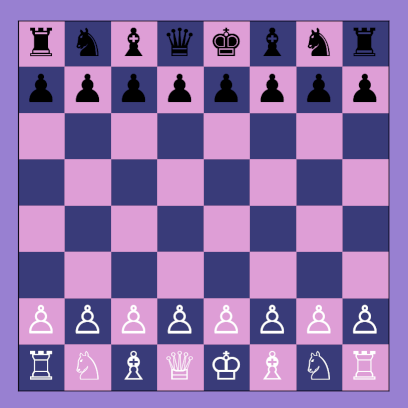

The goal of this project is to utilize CSV data with Chess match info to recreate the events of the match visually as an animation.

The CSV file is sourced from https://www.kaggle.com/datasets/datasnaek/chess which in turn sources from Lichess.org

Readings on chess notation were done on https://www.chess.com/terms/chess-notation

Help with reading CSV files obtained from https://www.statology.org/pandas-read-csv-only-specific-rows/ (also credited later in the code)

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

debug = False

### Create piece directory and chess board object:

In [2]:
# Class used to access piece ascii values due to easy accessibility for manual insertion
class pc:
    def __init__(self):
        self.PW = '♙'
        self.PB = '♟'
        self.NW = '♘'
        self.NB = '♞'
        self.BW = '♗'
        self.BB = '♝'
        self.RW = '♖'
        self.RB = '♜'
        self.QW = '♕'
        self.QB = '♛'
        self.KW = '♔'
        self.KB = '♚'
pc = pc()

# Dictionaries used for checking cases
white_pieces = {'R':'♖', 'N':'♘', 'B':'♗', 'Q':'♕', 'K':'♔', 'P':'♙'}
black_pieces = {'R':'♜', 'N':'♞', 'B':'♝', 'Q':'♛', 'K':'♚', 'P':'♟'}
#                 ['♜', '♞', '♝', '♛', '♚', '♟']

def alphaNum(char):
    if debug:
        print(f'DEBUG: [alphaNum] char is {char}')
    if (type(char) is int):
        return char
    else:
        return (ord(char) - 97)
    
def numAlpha(num):
    if debug:
        print(f'DEBUG: [numAlpha] num is {num}')
    return chr(ord(str(num))+49)

In [3]:
# Class that holds the location of all game pieces
class Board:

    def __init__(self, game_state=None):
        """Initializes the game board; when no arguments, creates a typical game of chess.
        
        return: A list containing board info"""
        if not (game_state == None):
            self.B = game_state
            return
        
        column_L = [None] * 8
        column_L[7] = [pc.RB, pc.NB, pc.BB, pc.QB, pc.KB, pc.BB, pc.NB, pc.RB]
        column_L[6] = [pc.PB for piece in range(0, 8)]
        column_L[1] = [pc.PW for piece in range(0, 8)]
        column_L[0] = [pc.RW, pc.NW, pc.BW, pc.QW, pc.KW, pc.BW, pc.NW, pc.RW]
        for i in range(2, 6):
            column_L[i] = [None for n in range(0, 8)]
        self.B = column_L
        self.game_end = False
        return

    
    
    def print_board(self):
        """Prints out the arrays that make up the game board.
        return: None"""
        for i in range(0, 8):
            print(self.B[i])
        
    def get_board(self):
        """Returns an array of arrays that composes the game board.
        return: Game board as arrays"""
        return self.B
        
    def square_info(self, alpha, num):
        """Returns info for a square on the chessboard, given board coordinates.
        Works with either classic alpha-numeric coordinates or cartesian coordinates.
        alpha: The column info (ie: 'a' or 1)
        num:   The row info (ie: 3)
        
        return: A list containing board info"""
        
        # Chessboards have a1 on the bottom left while the array origin is top left
        # Therefore, invert the row number and convert the letter to a number
        row = 8-num
        
        if isinstance(alpha, str):
            column = alphaNum(alpha)
            alpha_chr = alpha
        else:
            column = alpha-1
            alpha_chr = chr(alpha+96)
            
        return [f'Row: {num} (real: {row})', f'Column: {alpha_chr} (real: {column})', f'{alpha_chr}{num}', self.B[row][column]]
       
    
    def square(self, alpha, num):
        """Returns a chess-piece (if present) on a given square on the chessboard.
        Works with either classic alpha-numeric coordinates or cartesian coordinates.
        alpha: The column info (ie: 'a' or 1)
        num:   The row info (ie: 3)
        
        return: An ascii character representing a chess piece"""
        
        return self.square_info(alpha, num)[-1]
    
    def square2(board_state, alpha, num):
        """Returns a chess-piece (if present) on a given square on the chessboard.
        Works with either classic alpha-numeric coordinates or cartesian coordinates.
        board_state: An array representing a game board, from which data is checked
        alpha: The column info (ie: 'a' or 1)
        num:   The row info (ie: 3)
        
        return: An ascii character representing a chess piece"""
        if debug:
            print(f'DEBUG: [square2] Passed alpha {alpha} | num {num}')

        row = num
        
        if isinstance(alpha, str):
            column = alphaNum(alpha)
            alpha_chr = alpha
        else:
            column = alpha-1
            alpha_chr = chr(alpha+96)
            
        if debug:
            print(f'DEBUG: [square2] row {row} | column {column} | return {board_state[row][column]}')
        return board_state[row][column]
    
    
    def make_move(self, move_notation, move_number):
        """Updates the board-state given a move and turn.
        move_notation: A string representing a given move (eg: e4)
        move: The move number (Where the first time black moves a piece is the second move)
        
        return: None"""
        
        if (move_number%2 == 1):
            white_turn = True
        else:
            white_turn = False
            
        move_tokens = [sub.split() for sub in move_notation]
        move_tokens = [tok[0] for tok in move_tokens]

        if '+' in move_tokens:
            plt.ylabel('Check')
        elif '#' in move_tokens:
            plt.ylabel('Checkmate')
            self.game_end = True
        else:
            plt.ylabel(None)
        plt.xlabel(move_notation)
        
        first = move_tokens[0]
        if debug:
            print(f'move_notation is {move_notation}')
            print(f'move_tokens are {move_tokens} | First is {first} | type(first) is {type(first)}')
            
        if first in self.piece_functions:
            self.B = self.piece_functions[first](self.B, move_tokens, white_turn)
        else:
            self.B = self.piece_functions['P'](self.B, move_tokens, white_turn)
        
        return move_tokens

    def capture_message(captor, captee):
        """Prints a message on the plot when a piece is captured (not currently implemented).
        return: none"""
        if debug:
            print("DEBUG: [capture_message]")
        plt.ylabel(f'{captor} captured {captee}')
        
        return
    
    
    def move_king(board_state, move_tokens, white_turn):
        """Updates the game board with the specified piece moving for the specified player.
        board_state: Game board as arrays
        move_tokens: The current move, in chess notation
        white_turn: A bool value indicating whether it's white's turn to play
        
        return: An updated game board"""
        if debug:
            print('DEBUG: [move_king]')
        searching = True
        piece = Board.get_piece(move_tokens[0], white_turn)
        while searching:
            for k in range(0, 8):
                for j in range(0, 8): 
                    if (board_state[j][k] == piece):
                        board_state[j][k] = None
                        searching = False
                        break
        alpha, num = Board.new_coords(move_tokens)
        if debug:
            print(f'DEBUG: [move_king] alpha {alpha} | num {num}')
        if debug:
            print(f'Alpha {alpha} | num {num}')
            print(f'Board state {board_state}')
        board_state[num][alpha] = piece        
        return board_state
    
    def move_queen(board_state, move_tokens, white_turn):
        """Updates the game board with the specified piece moving for the specified player.
        board_state: Game board as arrays
        move_tokens: The current move, in chess notation
        white_turn: A bool value indicating whether it's white's turn to play
        
        return: An updated game board"""
        if debug:
            print('DEBUG: [move_queen]')
        searching = True
        piece = Board.get_piece(move_tokens[0], white_turn) #pc.KW
        while searching:
            for k in range(0, 8):
                for j in range(0, 8): 
                    if (board_state[j][k] == piece):
                        board_state[j][k] = None
                        searching = False
                        break
        alpha, num = Board.new_coords(move_tokens)
        if debug:
            print(f'DEBUG: [move_queen] alpha {alpha} | num {num}')
        if debug:
            print(f'Alpha {alpha} | num {num}')
            print(f'Board state {board_state}')
        board_state[num][alpha] = piece      
        
        return board_state
        
        
    def move_rook(board_state, move_tokens, white_turn):
        """Updates the game board with the specified piece moving for the specified player.
        board_state: Game board as arrays
        move_tokens: The current move, in chess notation
        white_turn: A bool value indicating whether it's white's turn to play
        
        return: An updated game board"""
        alpha_new, num_new = Board.new_coords(move_tokens)
        alph_check = numAlpha(alpha_new)
        dest_space = Board.square2(board_state, alph_check, num_new)
        spec = Board.piece_spec(move_tokens)
        if debug:
            print(f'DEBUG: [move_rook] dest_space holds {dest_space} | spec is {spec} | alph_check {alph_check} | alpha_new {alpha_new} | num_new {num_new}')
        if white_turn:
            new_piece = pc.RW
        else:
            new_piece = pc.RB
        
        # If a piece is specified
        if spec:
            # If column is specified
            if (97 <= ord(move_tokens[1]) <= 104):
                alpha_old, num_old = alphaNum(move_tokens[1]), num_new
            else:
                alpha_old, num_old = alpha_new, move_tokens[1]
        # Unspecified
        else:
            # Search U R D L
            vert = num_new
            horz = alpha_new
            found = False
            if debug:
                print(f'DEBUG: [move_rook] Searching for valid rook | vert {vert} | horz {horz}')
                
            # Up
            if not found:
                if debug:
                    print(f'DEBUG: [move_rook] Searching up')
                while (vert < 7):
                    vert += 1
                    if (board_state[vert][horz] == new_piece):
                        # Found; break out of check
                        found = True
                        alpha_old, num_old = horz, vert
                        vert = 9 
                    elif not (board_state[vert][horz] == None):
                        # Invalid path, break out
                        vert = 9 
            # Down
            vert = num_new
            if not found:
                if debug:
                    print(f'DEBUG: [move_rook] Searching down')
                while (vert > 0):
                    vert -= 1
                    if (board_state[vert][horz] == new_piece):
                        # Found; break out of check
                        found = True
                        alpha_old, num_old = horz, vert
                        vert = 0 
                    elif not (board_state[vert][horz] == None):
                        # Invalid path, break out
                        vert = 0 
            # Right
            vert = num_new
            if not found:
                if debug:
                    print(f'DEBUG: [move_rook] Searching right')
                while (horz < 7):
                    horz += 1
                    if (board_state[vert][horz] == new_piece):
                        # Found; break out of check
                        found = True
                        alpha_old, num_old = horz, vert
                        horz = 9 
                    elif not (board_state[vert][horz] == None):
                        # Invalid path, break out
                        horz = 9 
            # Left
            horz = alpha_new
            if not found:
                if debug:
                    print(f'DEBUG: [move_rook] Searching left')
                while (horz > 0):
                    horz -= 1
                    if (board_state[vert][horz] == new_piece):
                        # Found; break out of check
                        found = True
                        alpha_old, num_old = horz, vert
                        horz = 0
                    elif not (board_state[vert][horz] == None):
                        # Invalid path, break out
                        horz = 0
                
        if debug:
            print(f'DEBUG: [move_rook] alpha_old {alpha_old} | num_old {num_old}')
        board_state[num_old][alpha_old] = None
        board_state[num_new][alpha_new] = new_piece
        return board_state
            
    def move_knight(board_state, move_tokens, white_turn):
        """Updates the game board with the specified piece moving for the specified player.
        board_state: Game board as arrays
        move_tokens: The current move, in chess notation
        white_turn: A bool value indicating whether it's white's turn to play
        
        return: An updated game board"""
        alpha_new, num_new = Board.new_coords(move_tokens)
        alph_check = numAlpha(alpha_new)
        dest_space = Board.square2(board_state, alph_check, num_new)
        spec = Board.piece_spec(move_tokens)
        if debug:
            print(f'DEBUG: [move_knight] dest_space holds {dest_space} | spec is {spec} | alph_check {alph_check} | alpha_new {alpha_new} | num_new {num_new}')
        if white_turn:
            new_piece = pc.NW
        else:
            new_piece = pc.NB
            
        # If a piece is specified
        if spec:
            if debug:
                print(f'DEBUG: [move_knight] spec {spec}')
            # Index for next space value
            index = 2
            if 'x' in move_tokens:
                if debug:
                    print(f'DEBUG: [move_knight] x in move_tokens')
                index += 2
            else:
                if debug:
                    print(f'DEBUG: [move_knight] no x in move_tokens | {move_tokens}')
                
            # If column is specified
            if (97 <= ord(move_tokens[1]) <= 104):
                row_index = move_tokens[index+1]
                if debug:
                    print(f'DEBUG: [move_knight] Column specified | row_index is {row_index}')
            # Else row
            else:
                col_index = move_tokens[index]
                if debug:
                    print(f'DEBUG: [move_knight] Row specified | col_index is {col_index}')
                    
        # No piece specified
        else:
            if debug:
                print(f'DEBUG: [move_knight] No specification ({spec})')
            for k in range(0, 8):
                for j in range(0, 8): 
                    if (board_state[j][k] == new_piece):
                        if debug:
                            print(f'DEBUG: [move_knight] j {j} | k {k} | num_new {num_new} | alph_check {alpha_new}')
                        if ( (abs(j-num_new)==2) and (abs(k-alpha_new)==1) ) or ( (abs(j-num_new)==1) and (abs(k-alpha_new)==2) ):
                            num_old, alpha_old = j, k
                
        board_state[num_old][alpha_old] = None
        board_state[num_new][alpha_new] = new_piece
        return board_state
        
    def move_bishop(board_state, move_tokens, white_turn):
        """Updates the game board with the specified piece moving for the specified player.
        board_state: Game board as arrays
        move_tokens: The current move, in chess notation
        white_turn: A bool value indicating whether it's white's turn to play
        
        return: An updated game board"""
        alpha_new, num_new = Board.new_coords(move_tokens)
        alph_check = numAlpha(alpha_new)
        dest_space = Board.square2(board_state, alph_check, num_new)
        spec = Board.piece_spec(move_tokens)
        even_odd = (alpha_new + num_new)%2
        if debug:
            print(f'DEBUG: [move_bishop] dest_space holds {dest_space} | spec is {spec} | alph_check {alph_check} | alpha_new {alpha_new} | num_new {num_new} | even_odd {even_odd}')
        if white_turn:
            new_piece = pc.BW
        else:
            new_piece = pc.BB
        
        searching = True
        piece = Board.get_piece(move_tokens[0], white_turn) #pc.KW
        for k in range(0, 8):
            for j in range(0, 8): 
                if (board_state[j][k] == piece):
                    if debug:
                        print(f'DEBUG: looping... j+k%2 {(j+k)%2}')
                    if ((j+k)%2 == even_odd):
                        num_old, alpha_old = j, k         
                
        board_state[num_old][alpha_old] = None
        board_state[num_new][alpha_new] = new_piece
        return board_state
        
    def move_castle(board_state, move_tokens, white_turn):
        """Updates the game board with the specified strategy employed by the specified player.
        board_state: Game board as arrays
        move_tokens: The current move, in chess notation
        white_turn: A bool value indicating whether it's white's turn to play
        
        return: An updated game board"""
        if (len(move_tokens) == 5):
            side = 'queenside'
        elif (len(move_tokens) == 3):
            side = 'kingside'
        else:
            side = 'error'
        if debug:
            print(f'DEBUG: [move_castle] Moving {side} according to {move_tokens}')
            
        # White castling
        if white_turn:
            piece_K = pc.KW
            piece_R = pc.RW
            alpha_remK, num_remK = Board.new_coords(['e', '1']) # Coords for removing king piece
            if (side == 'kingside'):
                alpha_K, num_K = Board.new_coords(['g', '1'])
                alpha_R, num_R = Board.new_coords(['f', '1'])
                alpha_remR, num_remR = Board.new_coords(['h', '1']) # Coords for removing rook piece
            else:
                alpha_K, num_K = Board.new_coords(['c', '1'])
                alpha_R, num_R = Board.new_coords(['d', '1'])
                alpha_remR, num_remR = Board.new_coords(['a', '1']) # Coords for removing rook piece
        # Black castling
        else:
            piece_K = pc.KB
            piece_R = pc.RB
            alpha_remK, num_remK = Board.new_coords(['e', '8']) # Coords for removing king piece
            if (side == 'kingside'):
                alpha_K, num_K = Board.new_coords(['g', '8'])
                alpha_R, num_R = Board.new_coords(['f', '8'])
                alpha_remR, num_remR = Board.new_coords(['h', '8']) # Coords for removing rook piece
            else:
                alpha_K, num_K = Board.new_coords(['c', '8'])
                alpha_R, num_R = Board.new_coords(['d', '8'])
                alpha_remR, num_remR = Board.new_coords(['a', '8']) # Coords for removing rook piece
        
        board_state[num_remK][alpha_remK] = None
        board_state[num_remR][alpha_remR] = None
        board_state[num_K][alpha_K] = piece_K
        board_state[num_R][alpha_R] = piece_R
        
        return board_state
        
    def move_pawn(board_state, move_tokens, white_turn):
        """Updates the game board with the specified piece moving for the specified player.
        board_state: Game board as arrays
        move_tokens: The current move, in chess notation
        white_turn: A bool value indicating whether it's white's turn to play
        
        return: An updated game board"""
        promote = 'P'
        for check in move_tokens:
            if (check in Board.piece_functions):
                promote = check
                break
                
        if white_turn:
            old_piece = white_pieces['P']
            new_piece = white_pieces[promote]
            vert = -1
        else:
            old_piece = black_pieces['P']
            new_piece = black_pieces[promote]
            vert = +1
        

        alpha_new, num_new = Board.new_coords(move_tokens)
        alph_check = numAlpha(alpha_new)
        dest_space = Board.square2(board_state, alph_check, num_new)
        if debug:
            print(f'DEBUG: [move_pawn] Promote val is {promote} {new_piece} | alpha_new is {alpha_new} | alph_check is {alph_check} | num_new is {num_new} | dest_space is {dest_space}')
            
        # If no pieces are taken
        if not ('x' in move_tokens):
            if debug:
                print(f'DEBUG: [move_pawn] num_new {num_new} | type {type(num_new)}')
            board_check = Board.square2(board_state, alph_check, (num_new+vert))
            if debug:
                print(f'DEBUG: [move_pawn] No captures | Checking prev square at {alph_check} {num_new+vert} | board_check is {board_check} | old_piece is {old_piece}')

            if (board_check == old_piece):
                if debug:
                    print(f'DEBUG: [move_pawn] board_check matched {board_check} | removing val at {alph_check}{num_new+vert} ({Board.square2(board_state, alph_check, num_new+vert)}))')
                alpha_old, num_old = Board.new_coords([alph_check, (num_new+vert)])
                num_old += 1
            else:
                if debug:
                    print(f'DEBUG: [move_pawn] board_check didnt match {board_check} | removing val at {alph_check}{num_new+vert+vert} ({Board.square2(board_state, alph_check, num_new+vert+vert)}))')
                alpha_old, num_old = Board.new_coords([alph_check, (num_new+vert+vert)])
                num_old += 1
        # If a piece is taken
        else:
            board_check = Board.square2(board_state, move_tokens[0], (num_new+vert+1))
            if debug:
                print(f'DEBUG: [move_pawn] Capture scenario | Checking prev square at {alph_check} {num_new+vert+1}... board_check is {board_check} | old_piece is {old_piece}')
            alpha_old, num_old = Board.new_coords([move_tokens[0], (num_new+vert+1)])
            # Check en passant
            if dest_space is None:
                if debug:
                    print(f'DEBUG: [move_pawn] En passant dest_space is {dest_space}')
                #en passant
                alpha_captured, num_captured = Board.new_coords([alph_check, (num_new+vert+1)])
                board_state[num_captured][alpha_captured] = None
            
        if debug:
            print(f'DEBUG: [move_pawn] num_old {num_old} | alpha_old {alpha_old}')
        board_state[num_old][alpha_old] = None
        board_state[num_new][alpha_new] = new_piece
                
        return board_state
    
    
    def new_coords(tokens):
        """Updates the game board with the specified piece moving for the specified player.
        move_tokens: Chess notation containing information about the destination of the current piece at play
        
        return values are alphanumeric coordinates in chess notation
            alpha: the alphabet-wise coordinate
            num: the numeric coordinate"""
        if debug:
            print(f'DEBUG: [new_coords] second-to-last is {tokens[-2]} | last {tokens[-1]}')
        last = -1
        if (tokens[last] in ['+', '#']):
            last -= 1
        if (tokens[last] in Board.piece_functions):
            last -= 1
        alpha = alphaNum(tokens[last-1])
        num = int(tokens[last])
        return alpha, num-1
    
    def get_piece(symbol, white):
        """Returns an ascii value corresponding to the provided piece-symbol and player-color.
        symbol: A letter corresponding to the chess-notation indicator for a piece
        white: A bool value representing whether the piece is white (or else black)
        
        return: An ascii character representing the specified chess piece"""
        if not (symbol in Board.piece_functions):
            key = 'P'
        else:
            key = symbol
        
        if white:
            return white_pieces[key]
        else:
            return black_pieces[key]
        
    def piece_spec(tokens):
        """Returns whether a token specifies between multiple valid pieces."""
        count = 0
        for token in tokens:
            # Checks whether a token int value lies between values of 0-9 or a-h
            if (97 <= ord(token) <= 104) or (48 <= ord(token) <= 57):
                count += 1
        if 'x' in tokens:
            max = 3
        else:
            max = 2
        return (count > max)
        

    piece_functions = {
        'K':move_king, 'Q':move_queen, 'R':move_rook, 'N':move_knight, 
        'B':move_bishop, 'O':move_castle, 'P':move_pawn
    }

### Create chess board visuals:

In [4]:
board_bg = [[1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1]]

In [5]:
def update_board(board, move_number, colored_pieces=False):
    """Plots the board using pyplot.
    board: A board object whose pieces are fetched for plotting
    turn:  The turn number, which determines which side moves and generates the title. (Where the third move of the game is turn 2)

    return: None"""
    
    plt.imshow(board_bg, cmap="tab20b") 
    plt.xticks([]) 
    plt.yticks([]) 
    
    if (move_number == 0):
        turn = 0
        title = "New Game"
        subtitle = None
        
    elif (move_number %2 == 1):
        turn = (move_number//2)+1
        subtitle = "White's move"
        white_move = True
    else:
        turn = (move_number//2)
        subtitle = "Black's move"
        white_move = False
    
    if (board.game_end):
        title = "Game over"
        if white_move:
            subtitle = "White wins!"
        else:
            subtitle = "Black wins!"
    else:
        title = f"Turn {turn}"
    
    plt.suptitle(title)
    plt.title(subtitle)
    
    x = xi = -.40
    y = yi = 0.25

    colored_pieces = True
    if colored_pieces:
        white_color = 'w'
        black_color = 'k'#'#031533'


    for k in range(0, 8):
        for j in range(0, 8): 
            piece_symbol = board.square(j+1,k+1)
            color_val = None
            if colored_pieces:
                if (piece_symbol in white_pieces.values()):
                    color_val = white_color
                else:
                    color_val = black_color
            plt.text(x, y, piece_symbol, fontsize = 28, color=color_val) 
            x += 1
        x = xi
        y += 1


### Read CSV file:

In [6]:
### CSV access techniques— including "specific_rows" with lambda method— taken (and modified) from:
## https://www.statology.org/pandas-read-csv-only-specific-rows/

game_select = 2

specific_rows = [0,1,2,3,4,5,6,7,8,9,10]
csvFile = pd.read_csv('games.csv', skiprows = lambda x: x not in specific_rows)
moves = csvFile[['turns','moves']]
print(moves, '\n')
game_moves = moves['moves'][game_select]
print(f'Moves for this game: {game_moves}')
move_tokens = game_moves.split()
# print(f'\nTokens: {move_tokens}')

   turns                                              moves
0     13  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1     16  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2     61  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3     61  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4     95  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
5      5                                   e4 c5 Nf3 Qa5 a3
6     33  d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...
7      9                     e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4
8     66  e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...
9    119  e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b... 

Moves for this game: e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc6 bxc6 Ra6 Nc4 a4 c3 a3 Nxa3 Rxa3 Rxa3 c4 dxc4 d5 cxd5 Qxd5 exd5 Be6 Ra8+ Ke7 Bc5+ Kf6 Bxf8 Kg6 Bxg7 Kxg7 dxe6 Kh6 exf7 Nf6 Rxh8 Nh5 Bxh5 Kg5 Rxh7 Kf5 Qf3+ Ke6 Bg4+ Kd6 Rh6+ Kc5 Qe3+ Kb5 c4+ Kb4 Qc3+ Ka4 Bd1#


## Run simulation:

In [ ]:
length_of_mp4 = 60 #seconds
fpsVal = 0.90 #len(move_tokens)//length_of_mp4

from matplotlib.animation import FFMpegWriter
metadata = dict(title='Chess Game', artist='Edward Gilmore',comment='Chess game simulated from CSV data.')
writer = FFMpegWriter(fps=fpsVal, metadata=metadata,bitrate=200000)
fig = plt.figure(dpi=200)
%matplotlib qt
final_move = 0

with writer.saving(fig, "animation.mp4", dpi=200):
    fig.patch.set_facecolor('#9880d1')
    board = Board()
    update_board(board, 0)
    plt.show()
    plt.draw()
    writer.grab_frame()
    

    update_board(board, 0)
    plt.show() 

    i = 1
    for move in move_tokens:
        if debug:
            print(f'Move {i}...')
        fig.clear()

        board.make_move(move, i)    
        update_board(board, i)
        plt.show() 
        writer.grab_frame()
        
        final_move = i
        i += 1
#     # Extend ending for gif
#     for i in range(0, 5):
#         fig.clear()
#         update_board(board, final_move)
#         plt.xlabel('Checkmate')
#         plt.show() 
#         writer.grab_frame()

<Figure size 1280x960 with 0 Axes>

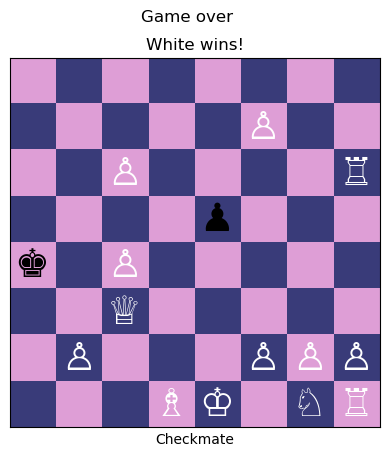

In [8]:
%matplotlib inline
fig.clear()
fig = plt.figure(dpi=100)
update_board(board, final_move)
plt.xlabel('Checkmate')
plt.show() 